# Audio Support

Some modern LLMs have native audio support. In this notebook we show how `irouter` makes audio queries as simple as text (`chat.ipynb`), image (`img.ipynb`) and PDF (`pdf.ipynb`) queries.

In [ ]:
from irouter import Call
from IPython.display import Audio, Image, display

# To load OPENROUTER_API_KEY from .env file create a .env file at the root of the project with OPENROUTER_API_KEY=your_api_key
# Alternatively pass api_key=your_api_key to the Call or Chat class
from dotenv import load_dotenv

load_dotenv()

True

As an example we will use an audio file of bottles clinking. There are a limited amount of models that support audio input. In this example we use Google's `gemini-2.5-flash` LLM.

To check which models support audio input, check the [OpenRouter Model Overview](https://openrouter.ai/models?fmt=cards&input_modalities=audio).

In [ ]:
# Make sure to use an LLM that supports audio input
model_name = "google/gemini-2.5-flash"
# .mp3 and .wav files are supported
audio_path = "../assets/bottles.mp3"

In [15]:
display(Audio(audio_path))

# Local Audio Files

The simplest way to work with audio files in `irouter` is to simply pass the filepath and the instruction as a list of strings.

In [16]:
c = Call(model_name)
c([audio_path, "What do you hear?"], temperature=0)

'I hear the sound of a glass bottle being opened and closed, along with the distinct clinking of glass. \n'

# Combining multiple modalities

Passing multiple modalities to the LLM is as simple as passing a list of strings.

Here we simply pass both an image and an audio file to the LLM.

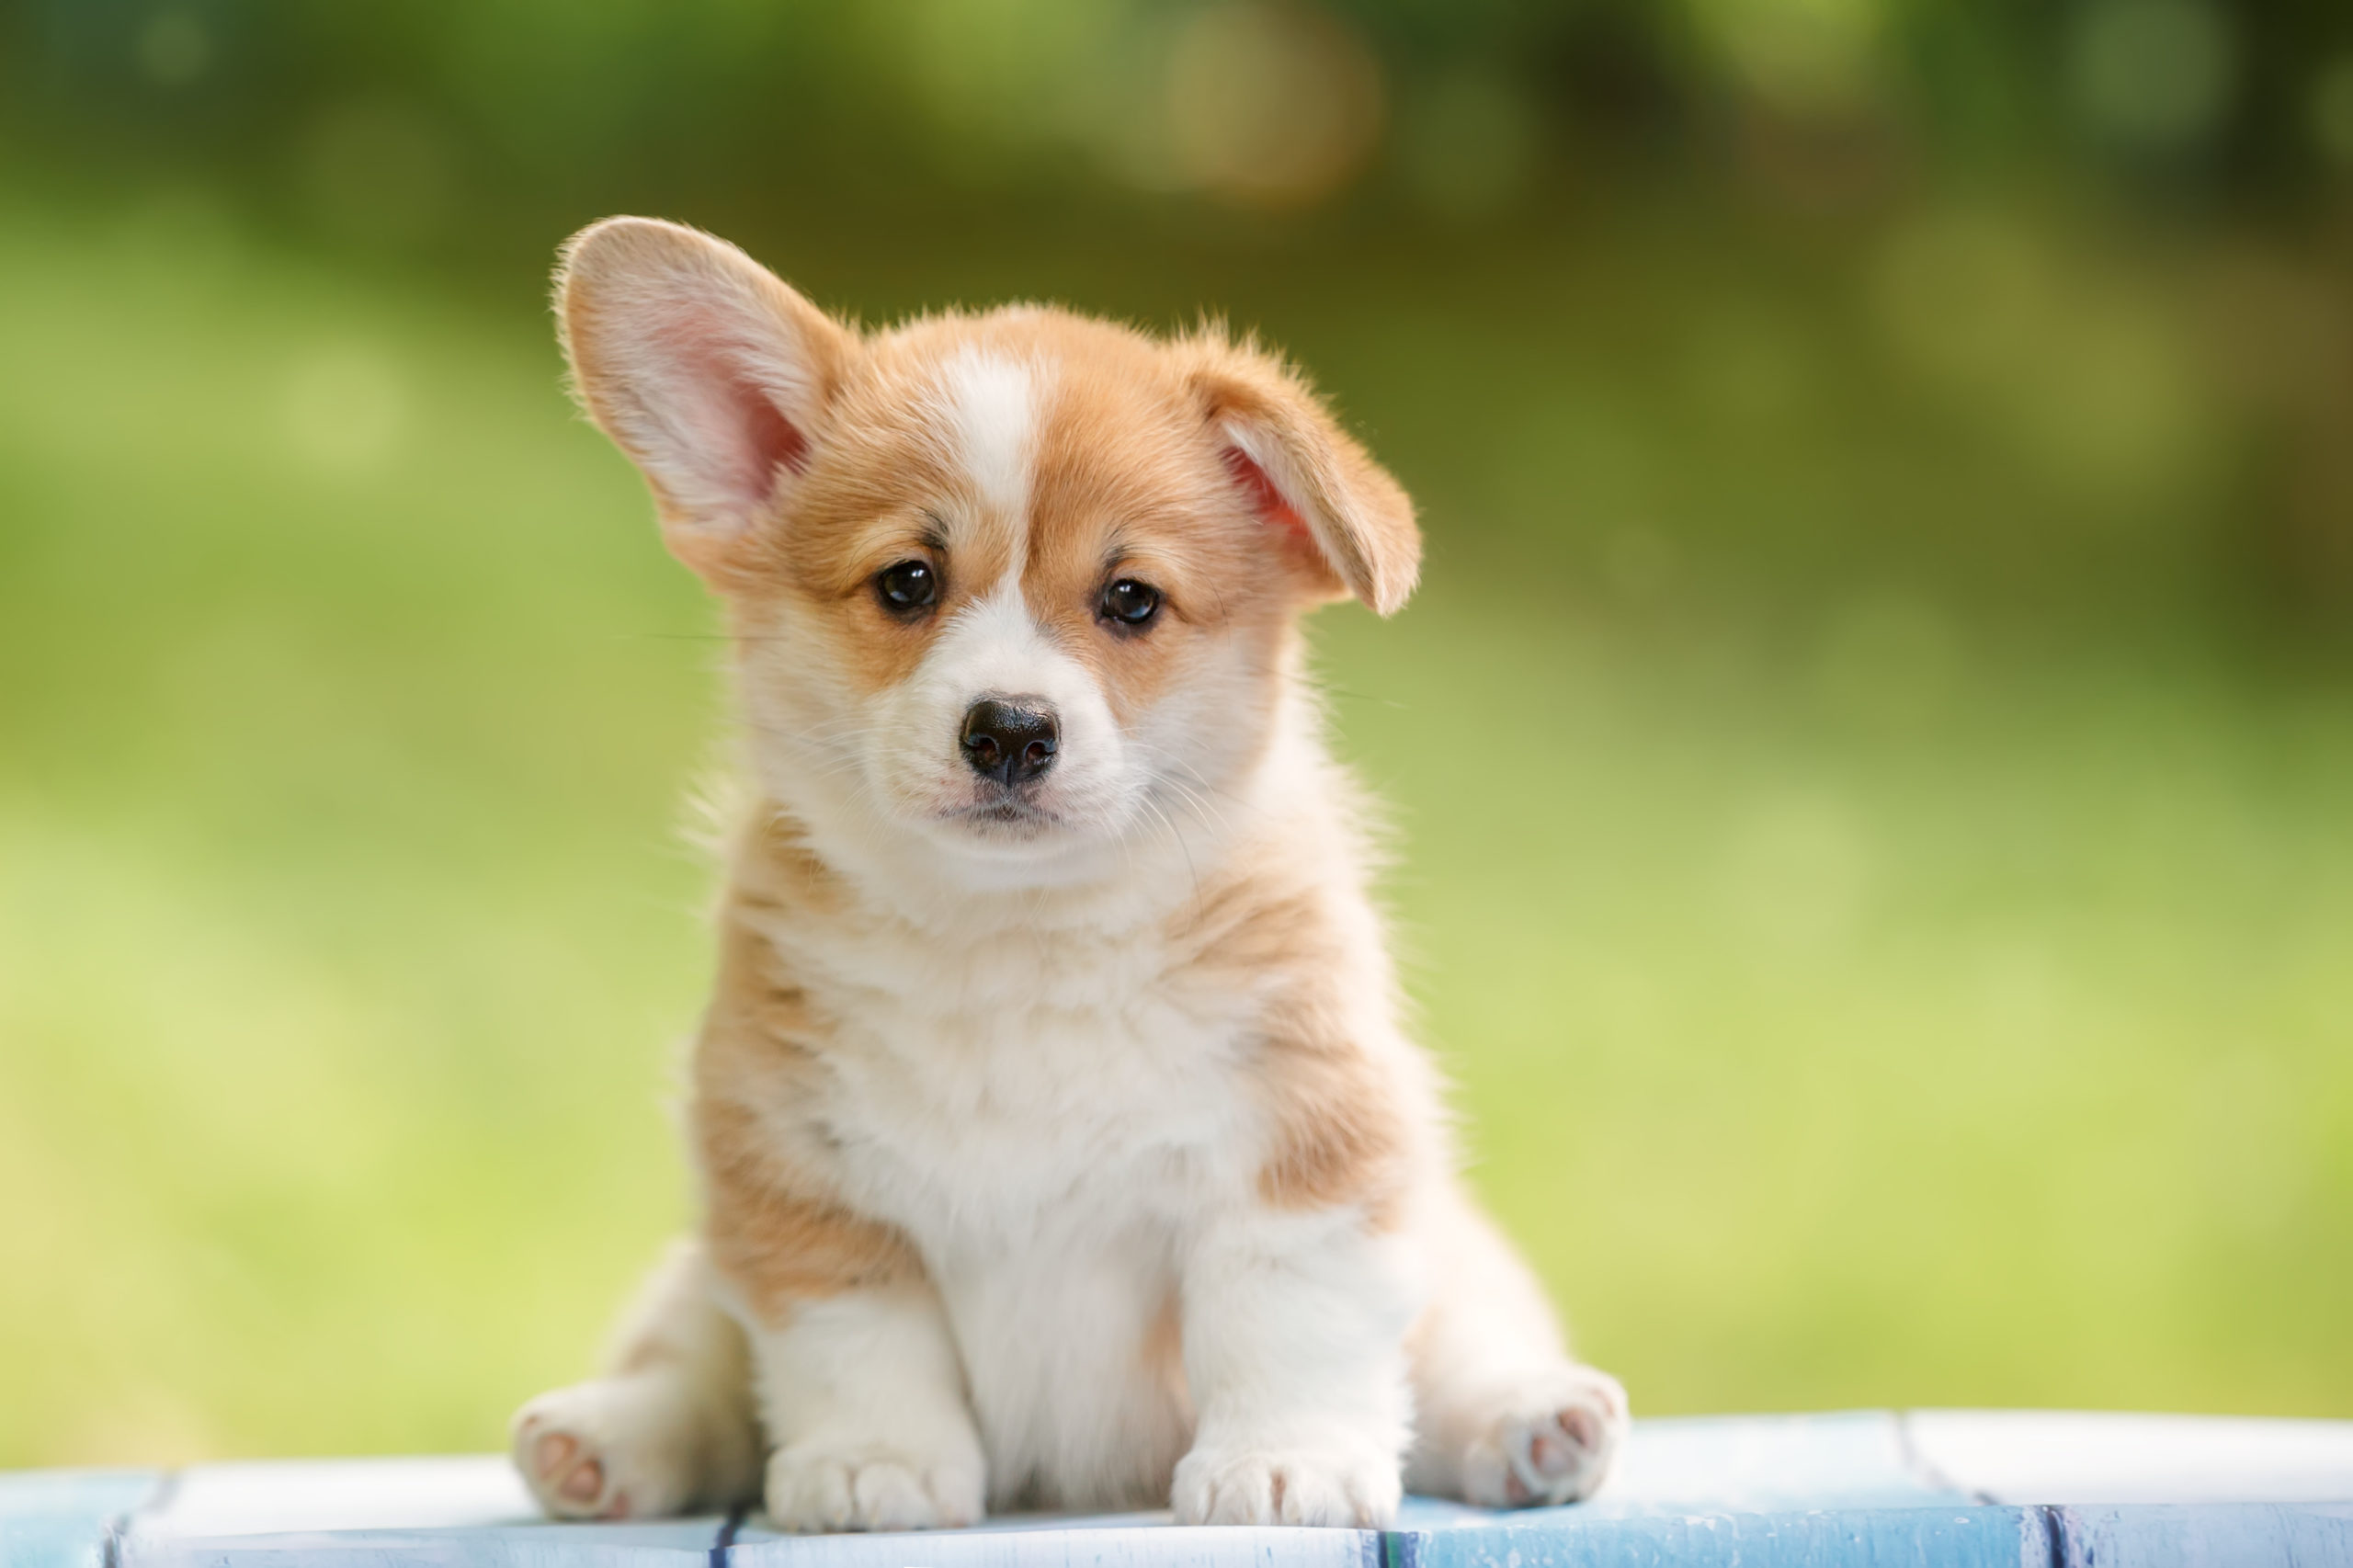

In [ ]:
img_path = "../assets/puppy.jpg"
display(Image(img_path, width=300))

In [ ]:
c(
    [
        audio_path,
        img_path,
        "What do you hear and what do you see? Limit your response to 1 sentence.",
    ]
)

'I hear sounds of glass or ceramic and see a small, fluffy dog on a blue surface with a green background.'